In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

import pickle

In [3]:
FILENAME = 'data.pickle'

with open(FILENAME, 'rb') as f:
    data = pickle.load(f)

    
stim = data['stim']
rho = data['rho']

In [7]:
stim[0:20]

array([-111.94824219,  -81.80664062,   10.21972656,   83.36425781,
         69.375     ,    2.66113281,  -25.91796875,  -32.24609375,
        -27.29492188,  -20.24414062,  -32.21679688,   -8.61816406,
         35.06347656,   55.92285156,   46.72851562,   53.75976562,
         96.84082031,  121.67480469,  109.58984375,   71.92871094])

In [25]:
rho[0:40]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1], dtype=uint8)

In [14]:
st = rho[0:40].nonzero()

In [18]:
st

(array([17, 22, 25, 31, 34, 39]),)

In [21]:
type(st)

tuple

In [22]:
type(st[0])

numpy.ndarray

In [17]:
st[0][0]

17

In [10]:
stim.size

600000

In [26]:
np.zeros((3,))

array([0., 0., 0.])

In [38]:
sp_tm = rho[150:].nonzero()[0] + 150

In [51]:
sp_tm[0]

158

In [39]:
sp_tm.size

53583

In [53]:
def compute_sta(stim, rho, num_timesteps):
    """Compute the spike-triggered average from a stimulus and spike-train.
    
    Args:
        stim: stimulus time-series
        rho: spike-train time-series
        num_timesteps: how many timesteps to use in STA
        
    Returns:
        spike-triggered average for specified number of timesteps before spike"""
    
    sta = np.zeros((num_timesteps,))

    # This command finds the indices of all of the spikes that occur
    # after 300 ms into the recording.
    spike_times = rho[num_timesteps:].nonzero()[0] + num_timesteps

    # Fill in this value. Note that you should not count spikes that occur
    # before 300 ms into the recording.
    num_spikes = spike_times.size
    
    # Compute the spike-triggered average of the spikes found.
    # To do this, compute the average of all of the vectors
    # starting 300 ms (exclusive) before a spike and ending at the time of
    # the event (inclusive). Each of these vectors defines a list of
    # samples that is contained within a window of 300 ms before each
    # spike. The average of these vectors should be completed in an
    # element-wise manner.
    # 
    # Your code goes here.
    for i in range(num_spikes):
        st = spike_times[i]
        sta += stim[st-num_timesteps + 1 : st + 1] / num_spikes
    
    return sta

In [32]:
tm = (np.arange(-3, 0) + 1) * 2

In [48]:
a = np.arange(1, 5)

In [46]:
a += a

In [52]:
a

array([1, 2, 3, 4])

In [33]:
tm

array([-4, -2,  0])

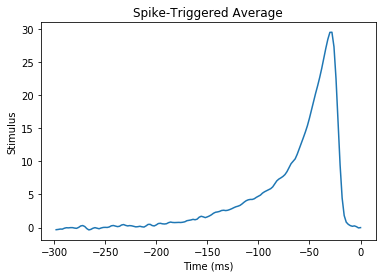

In [54]:
# Fill in these values
sampling_period = 2 # in ms
num_timesteps = 150

sta = compute_sta(stim, rho, num_timesteps)

time = (np.arange(-num_timesteps, 0) + 1) * sampling_period

plt.plot(time, sta)
plt.xlabel('Time (ms)')
plt.ylabel('Stimulus')
plt.title('Spike-Triggered Average')

plt.show()